# Perceptron 6

More time series prediction.

In [2]:
import numpy as np; np.random.seed(0)

from ann.plotting import subplots
from ann.timeseries import *

Using Theano backend.


In [3]:
dataset1 = test_dataset(noise=0.03)
dataset2 = test_dataset(noise=0.09)
dataset3 = test_dataset(noise=0.18)

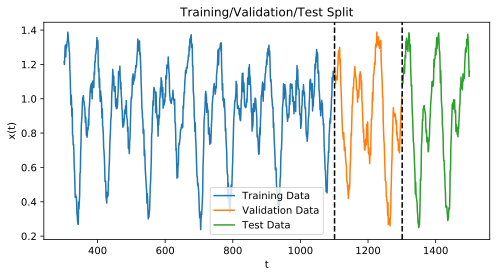

In [4]:
dataset1.preview()

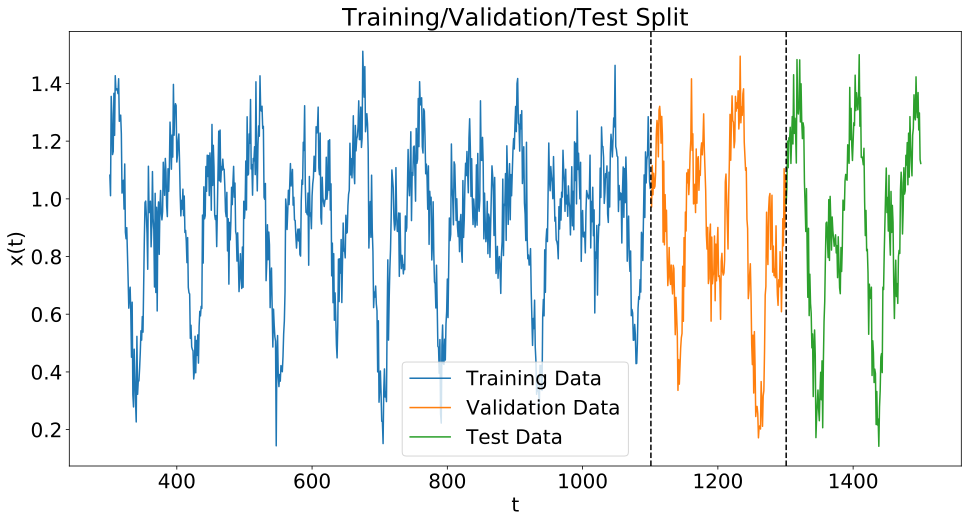

In [4]:
dataset2.preview()

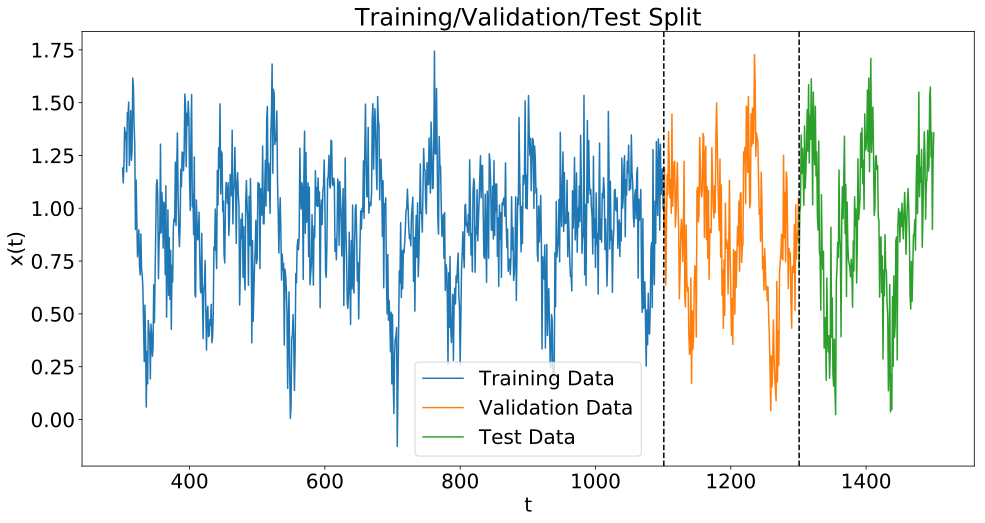

In [4]:
dataset3.preview()

plt.savefig('../figures/timeseries_noisy.svg')

In [42]:
model = TimeSeriesPredictor(inputs=5,
                            hidden_nodes=(5, 8),
                            outputs=1)

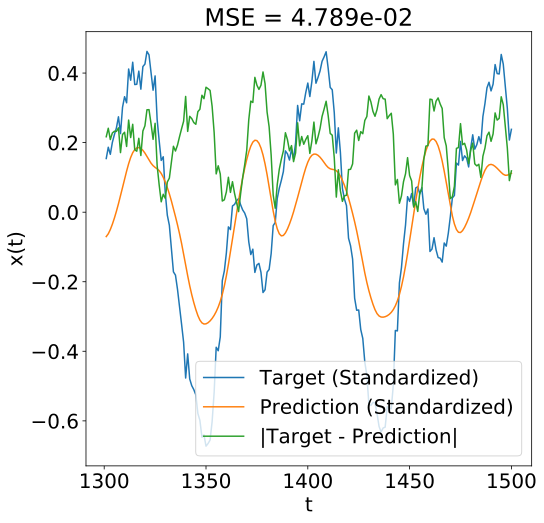

In [43]:
model.train(dataset1, verbose=True)

evaluate_generalization(dataset1, model)

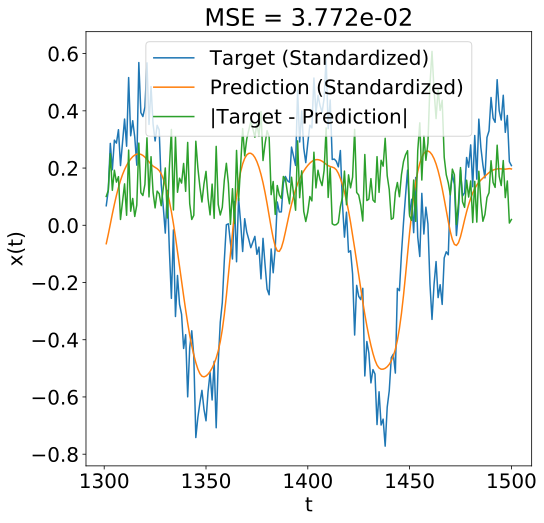

In [38]:
model.train(dataset2, final=True, verbose=True)

evaluate_generalization(dataset2, model)

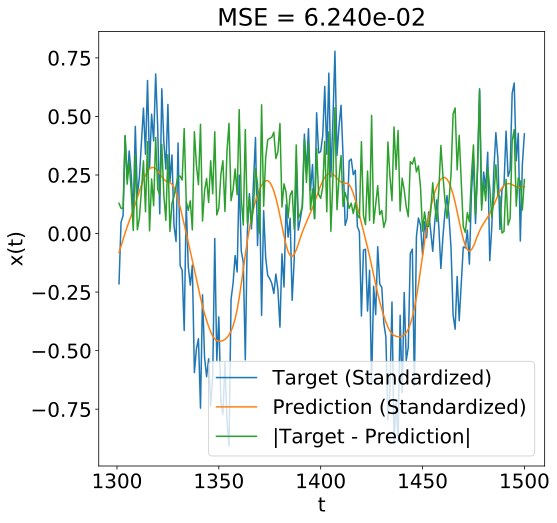

In [40]:
model.train(dataset3, final=True, verbose=True)

evaluate_generalization(dataset3, model)

# Validation Performance for Varying Noise Levels

# Interplay of Regularization and Noise

(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)


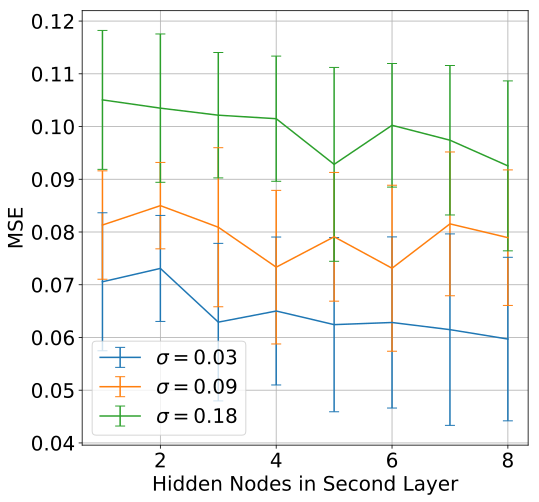

In [6]:
evaluate_noise1([dataset1, dataset2, dataset3],
                 hidden_nodes=[(5, n) for n in range(1, 9)],
                 stop_early=False,
                 regularization=0)

plt.savefig('../figures/evaluate_noise1.svg')

(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)


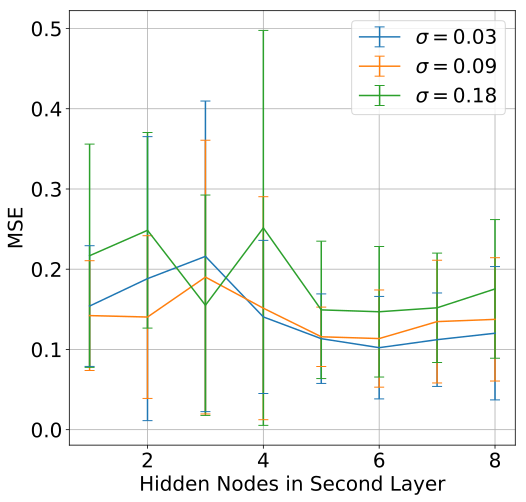

In [8]:
evaluate_noise1([dataset1, dataset2, dataset3],
                 hidden_nodes=[(5, n) for n in range(1, 9)],
                 regularization=0)

plt.savefig('../figures/evaluate_noise1_early_stop.svg')

1e-05
0.0001
0.001
0.01
0.1
1e-05
0.0001
0.001
0.01
0.1
1e-05
0.0001
0.001
0.01
0.1


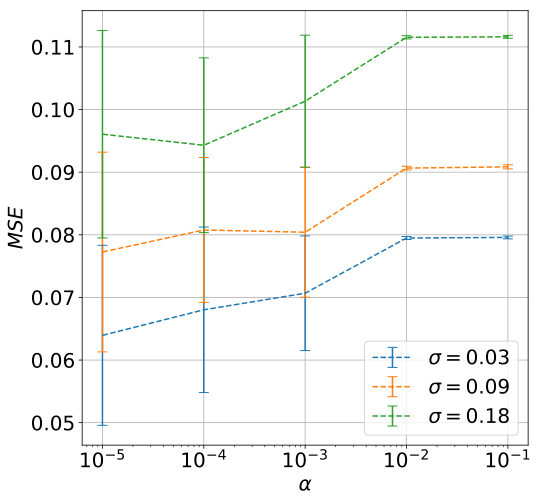

In [7]:
evaluate_noise2([dataset1, dataset2, dataset3],
                 hidden_nodes=(5, 5),
                 regularization=np.logspace(-5, -1, 5),
                 stop_early=False)

plt.savefig('../figures/evaluate_noise2.svg')

1e-05
0.0001
0.001
0.01
0.1
1e-05
0.0001
0.001
0.01
0.1
1e-05
0.0001
0.001
0.01
0.1


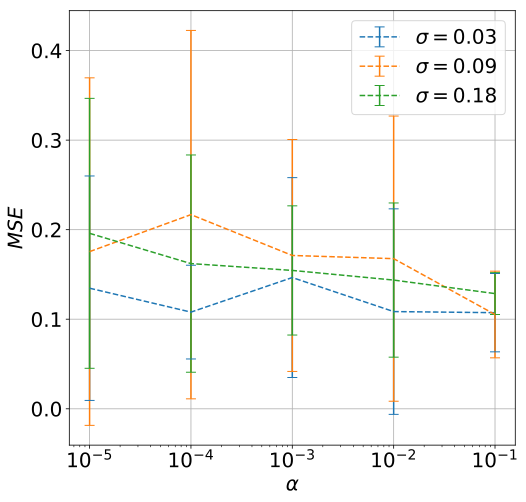

In [9]:
evaluate_noise2([dataset1, dataset2, dataset3],
                 hidden_nodes=(5, 5),
                 regularization=np.logspace(-5, -1, 5))

plt.savefig('../figures/evaluate_noise2_early_stop.svg')

# Find Best Model Trained on Noisy Data

In [3]:
evaluate_networks_table(dataset2,
                        hidden_nodes=[(5, n) for n in range(1, 9)],
                        regularization=np.concatenate(([0], np.logspace(-4, -2, 3))))

HN   REG         ETR (Mean)  ETR (Std)   EV (Mean)   EV (Std)    ET (Mean)   ET (Std)    EP (Mean)   EP (Std)    
1    0.00e+00    1.75e-01    1.25e-01    2.02e-01    1.31e-01    2.18e-01    1.27e-01    20.40       9.54        
1    1.00e-04    1.69e-01    8.25e-02    2.02e-01    8.25e-02    2.14e-01    8.21e-02    18.65       5.17        
1    1.00e-03    2.13e-01    2.55e-01    2.34e-01    2.47e-01    2.53e-01    2.54e-01    18.00       9.73        
1    1.00e-02    1.63e-01    1.55e-01    1.93e-01    1.71e-01    2.08e-01    1.58e-01    59.20       29.00       
2    0.00e+00    1.90e-01    1.39e-01    2.05e-01    1.46e-01    2.30e-01    1.41e-01    15.55       8.63        
2    1.00e-04    1.91e-01    1.89e-01    2.18e-01    1.96e-01    2.33e-01    1.92e-01    14.65       9.55        
2    1.00e-03    1.52e-01    1.18e-01    1.76e-01    1.31e-01    1.95e-01    1.21e-01    18.30       9.11        
2    1.00e-02    1.26e-01    1.13e-01    1.54e-01    1.29e-01    1.71e-01    1.16e-01   

In [5]:
evaluate_networks_table(dataset2,
                        hidden_nodes=[(5, 8)],
                        regularization=np.concatenate(([0], np.logspace(-4, -2, 3))),
                        runs=100)

HN   REG         ETR (Mean)  ETR (Std)   EV (Mean)   EV (Std)    ET (Mean)   ET (Std)    EP (Mean)   EP (Std)    
8    0.00e+00    1.17e-01    7.47e-02    1.37e-01    7.04e-02    1.58e-01    7.49e-02    20.02       10.50       
8    1.00e-04    1.10e-01    8.60e-02    1.33e-01    9.38e-02    1.52e-01    8.85e-02    19.93       11.15       
8    1.00e-03    1.31e-01    8.74e-02    1.54e-01    9.19e-02    1.73e-01    8.89e-02    22.93       11.90       
8    1.00e-02    1.00e-01    1.15e-01    1.25e-01    1.23e-01    1.44e-01    1.17e-01    7.53        21.21       


In [3]:
evaluate_networks_table(dataset2,
                        hidden_nodes=[(5, 8)],
                        regularization=np.concatenate(([0], np.logspace(-4, -2, 3))),
                        stop_early=False,
                        runs=100)

HN   REG         ETR (Mean)  ETR (Std)   EV (Mean)   EV (Std)    ET (Mean)   ET (Std)    EP (Mean)   EP (Std)    
8    0.00e+00    5.79e-02    8.79e-03    7.76e-02    1.22e-02    9.48e-02    1.48e-02    100.00      0.00        
8    1.00e-04    5.51e-02    1.03e-02    7.38e-02    1.43e-02    9.00e-02    1.75e-02    100.00      0.00        
8    1.00e-03    5.88e-02    8.23e-03    7.89e-02    1.14e-02    9.63e-02    1.40e-02    100.00      0.00        
8    1.00e-02    6.73e-02    4.91e-05    9.08e-02    3.98e-04    1.11e-01    1.23e-04    100.00      0.00        


# Compare Generalization Performance with Previous best Network

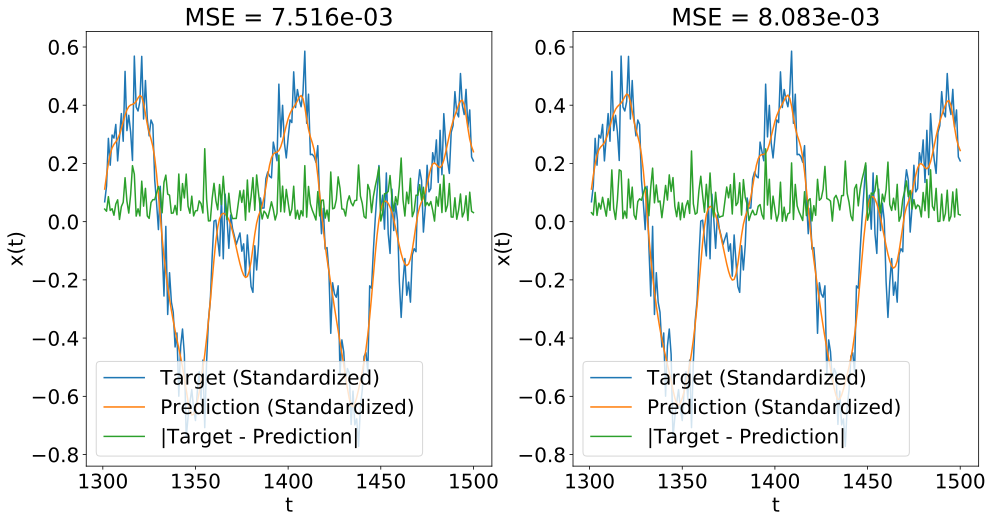

In [15]:
_, (ax1, ax2) = subplots(1, 2)

evaluate_generalization(dataset2, hidden_nodes=5, regularization=0, epochs=10000, final=True, runs=1, ax=ax1)

evaluate_generalization(dataset2, hidden_nodes=(5, 8), regularization=0, epochs=10000, final=True, runs=1, ax=ax2)

plt.savefig('../figures/timeseries_final_testerror.svg')

In [15]:
test_errors1 = []
test_errors2 = []

for _ in range(100):
    print(_)
    model_final1.train(dataset2, final=True)
    test_errors1.append(model_final1.test_error(dataset2))

    model_final2.train(dataset2, final=True)
    test_errors2.append(model_final2.test_error(dataset2))
    
print("Two layers: {} +/- {}".format(np.mean(test_errors1), np.std(test_errors1)))
print("Three layers: {} +/- {}".format(np.mean(test_errors2), np.std(test_errors2)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Two layers: 0.04239838011549321 +/- 0.024681047901454402
Three layers: 0.058644599309955275 +/- 0.027663764484170437


# Look at other Noise Values

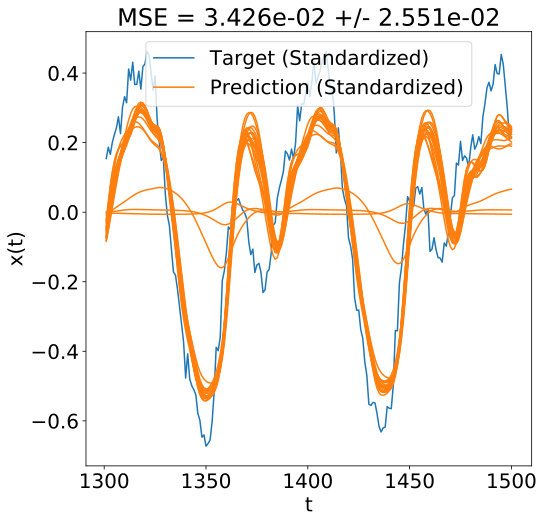

In [7]:
evaluate_generalization(dataset1,
                        hidden_nodes=5,
                        regularization=0,
                        stop_early=False,
                        final=True)

plt.savefig('../figures/final_sigma0.svg')

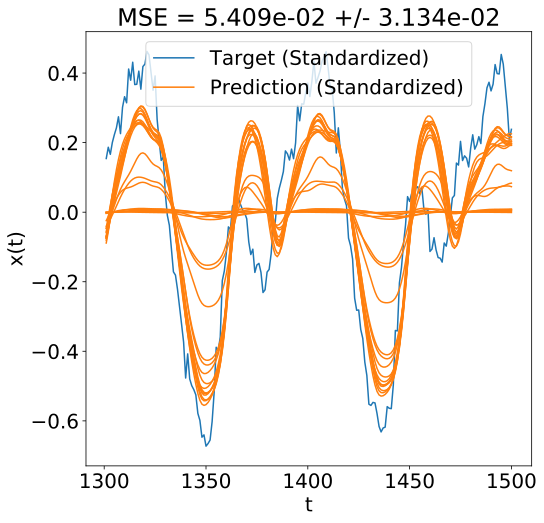

In [8]:
evaluate_generalization(dataset1,
                        hidden_nodes=(5, 8),
                        regularization=0,
                        stop_early=False,
                        final=True)

plt.savefig('../figures/final_sigma1.svg')

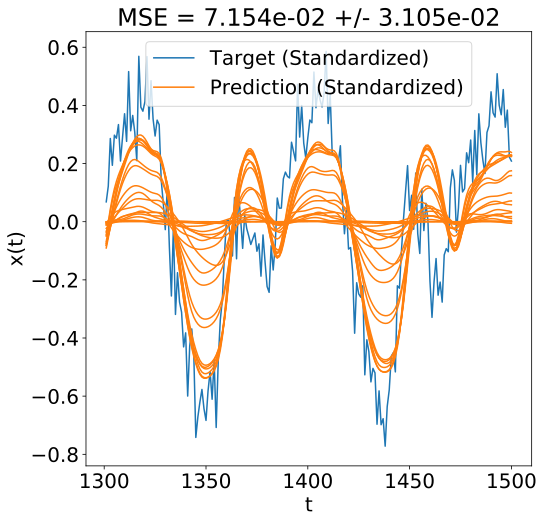

In [9]:
evaluate_generalization(dataset2,
                        hidden_nodes=(5, 8),
                        regularization=0,
                        stop_early=False,
                        final=True)

plt.savefig('../figures/final_sigma2.svg')

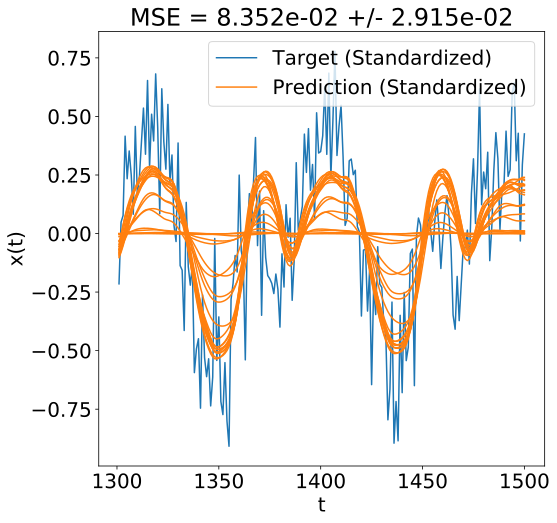

In [15]:
evaluate_generalization(dataset3,
                        hidden_nodes=(5, 8),
                        regularization=0,
                        stop_early=False,
                        final=True)

plt.savefig('../figures/final_sigma3.svg')

# Network Training Time Comparison

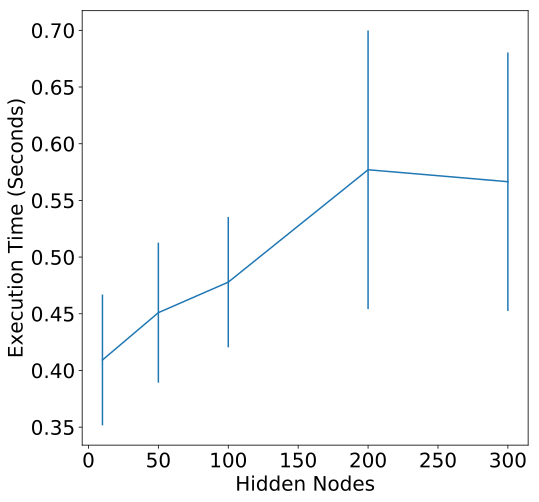

In [8]:
dataset = test_dataset()

evaluate_training_time(dataset, hidden_nodes=[10, 50, 100, 200, 300])

plt.savefig('../figures/training_time_single.svg')

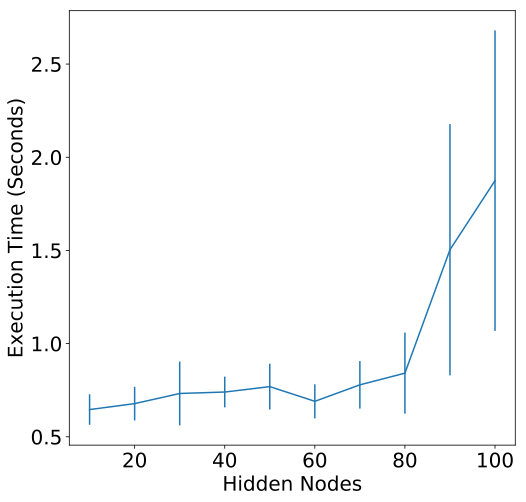

In [5]:
dataset = test_dataset()

evaluate_training_time(dataset, hidden_nodes=[(n, n) for n in range(10, 101, 10)])

plt.savefig('../figures/training_time.svg')